In [ ]:
from google.colab import drive 
drive.mount('gdrive')

Mounted at gdrive


In [177]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras import layers, models, backend as K, callbacks
from keras.layers import LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn import preprocessing
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.layers import TimeDistributed
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [136]:
stock_market_df = pd.read_csv('/content/gdrive/MyDrive/Stock_market_label_data.csv')
stock_market_df = stock_market_df[: 15850]
stock_market_df['Match'] = stock_market_df['Match'].astype(int)
stock_market_df['Match'] = stock_market_df['Match'].replace([-1], 0)
stock_market_df.drop(columns=['Company_Name', 'Unnamed: 0', 'Date', 'Name'], inplace=True)
stock_market_df.fillna(0)
stock_market_df = stock_market_df[: 15862]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [137]:
orginalColumn_lsit = stock_market_df.columns

In [138]:
stock_market_df_1 = stock_market_df.drop(columns=['Match'])
X=stock_market_df_1.values.astype(float)
y= stock_market_df['Match'].values.astype(float)

In [139]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(X)

In [151]:
new_datframe_X = pd.DataFrame(dataset)
new_datframe_y = pd.DataFrame(y)
new_datframe = pd.concat([new_datframe_X, new_datframe_y], axis=1)
new_datframe.columns = orginalColumn_lsit
dataset = np.array(new_datframe.values)

In [152]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i+look_back, -1])
	return np.array(dataX), np.array(dataY)

In [153]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

12680 3170


In [160]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [161]:
trainY

array([1., 0., 1., ..., 1., 0., 0.])

In [162]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [163]:
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1,30), return_sequences=True))
model.add(TimeDistributed(layers.Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = [tf.keras.metrics.AUC()])
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
6325/6325 - 13s - loss: 0.6933 - auc_7: 0.4973
Epoch 2/100
6325/6325 - 11s - loss: 0.6930 - auc_7: 0.4991
Epoch 3/100
6325/6325 - 11s - loss: 0.6929 - auc_7: 0.5032
Epoch 4/100
6325/6325 - 11s - loss: 0.6928 - auc_7: 0.5077
Epoch 5/100
6325/6325 - 11s - loss: 0.6924 - auc_7: 0.5209
Epoch 6/100
6325/6325 - 11s - loss: 0.6919 - auc_7: 0.5289
Epoch 7/100
6325/6325 - 11s - loss: 0.6909 - auc_7: 0.5426
Epoch 8/100
6325/6325 - 11s - loss: 0.6898 - auc_7: 0.5505
Epoch 9/100
6325/6325 - 11s - loss: 0.6877 - auc_7: 0.5616
Epoch 10/100
6325/6325 - 11s - loss: 0.6846 - auc_7: 0.5756
Epoch 11/100
6325/6325 - 11s - loss: 0.6826 - auc_7: 0.5815
Epoch 12/100
6325/6325 - 11s - loss: 0.6810 - auc_7: 0.5865
Epoch 13/100
6325/6325 - 11s - loss: 0.6802 - auc_7: 0.5895
Epoch 14/100
6325/6325 - 11s - loss: 0.6779 - auc_7: 0.5965
Epoch 15/100
6325/6325 - 11s - loss: 0.6762 - auc_7: 0.6004
Epoch 16/100
6325/6325 - 11s - loss: 0.6748 - auc_7: 0.6040
Epoch 17/100
6325/6325 - 11s - loss: 0.6734 - auc

In [164]:
result = model.predict(testX, verbose=0)

In [165]:
result

array([[[0.44391215]],

       [[0.44116515]],

       [[0.43712232]],

       ...,

       [[0.4680324 ]],

       [[0.46736413]],

       [[0.46631458]]], dtype=float32)

In [189]:
result

array([[[0.44391215]],

       [[0.44116515]],

       [[0.43712232]],

       ...,

       [[0.4680324 ]],

       [[0.46736413]],

       [[0.46631458]]], dtype=float32)

In [188]:
result[:, -1]

array([[0.44391215],
       [0.44116515],
       [0.43712232],
       ...,
       [0.4680324 ],
       [0.46736413],
       [0.46631458]], dtype=float32)

In [170]:
roc_auc_score(testY, result[:, -1])

0.6475687889778496

In [175]:
fpr, tpr, thersolds = roc_curve(testY, result[:, -1])

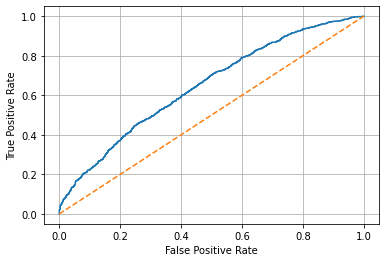

In [178]:
plt.plot(fpr, tpr)
plt.plot([0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()